#Context
In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

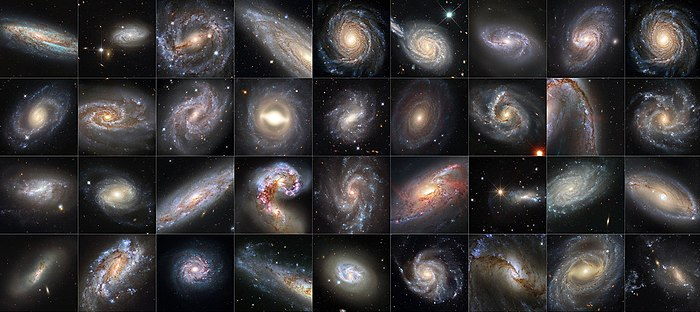

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation



###Citation
fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

#### Had to upgrade matplot because the built-in dumbass can't support shet.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
sns.__version__

'0.11.2'

# EDA - Exploratory Data Analysis

In [4]:
#load the data
df = pd.read_csv('/content/drive/MyDrive/Classroom/Data Science Project Bootcamp Batch (1)/Data/star_classification.csv')

In [5]:
df.shape

(100000, 18)

In [6]:
df.sample(n = 10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
31154,1.237665e+18,142.816692,26.549882,18.15854,16.06693,15.11589,14.63100,14.29576,4576,301,2,201,2.582916e+18,GALAXY,0.045742,2294,54524,370
49122,1.237679e+18,28.000309,11.398465,21.10700,21.00602,20.82762,20.70712,20.59962,7773,301,3,493,1.244459e+19,QSO,1.224126,11053,58437,52
60456,1.237666e+18,46.842201,0.713454,20.96659,19.15591,18.68033,18.51600,18.24912,4849,301,5,767,9.031370e+17,GALAXY,0.031242,802,52289,601
2242,1.237680e+18,329.891983,16.912272,22.67685,20.72006,18.99099,18.36306,17.94138,8096,301,4,36,5.661146e+18,GALAXY,0.345044,5028,55836,440
26018,1.237668e+18,209.434034,20.000242,22.32233,21.89067,20.70110,19.74153,19.19972,5194,301,2,616,6.607011e+18,GALAXY,0.614580,5868,56045,837
74125,1.237679e+18,4.800731,9.084510,23.12943,23.11011,21.38455,20.23318,19.58964,7880,301,1,74,5.107356e+18,GALAXY,0.597415,4536,55857,998
58504,1.237661e+18,195.961560,46.229686,21.27502,21.18553,21.11720,20.92471,20.72000,3699,301,2,72,8.347589e+18,QSO,1.508069,7414,56748,609
8362,1.237654e+18,125.578475,44.711007,24.23619,22.06039,20.78453,19.69543,19.06455,2076,301,4,148,7.183461e+18,STAR,-0.000181,6380,56340,799
78283,1.237662e+18,183.535245,43.178605,22.31107,21.48502,21.25348,20.82753,20.42463,3893,301,5,168,7.473730e+18,GALAXY,0.934246,6638,56370,23
91985,1.237653e+18,15.922299,-9.438059,20.64612,17.82336,16.60181,16.12816,15.84545,1740,301,4,127,3.500540e+18,STAR,-0.000019,3109,54833,426


In [7]:
df.info() #We have 100K total rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [8]:
df.isnull().sum()  #Checking total of null values if they exist.

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [9]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [10]:
df.corr()  #Checking if there's correlations between rows and columns

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


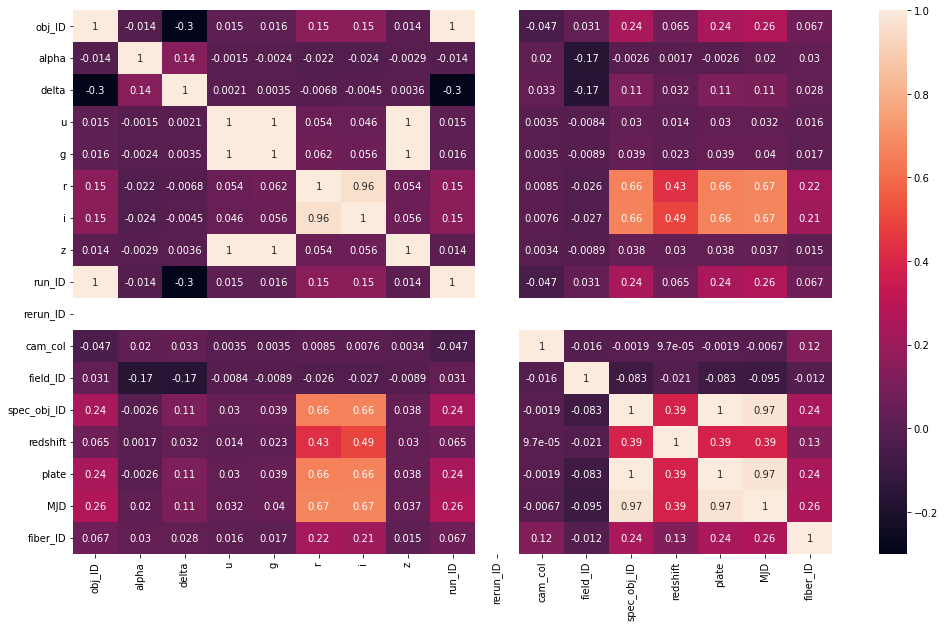

In [11]:
# Correlation heatmap for picture purposes
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True);

In [12]:
df['class'].value_counts()  #We can see class imbalance in this. There are more data of galaxies than others.

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

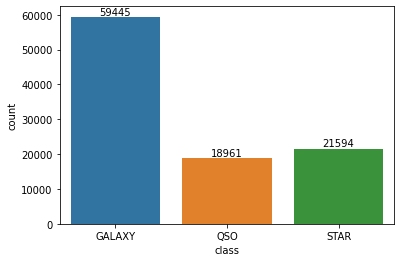

In [13]:
# If we plot this...
ax = sns.countplot(x=df["class"])
ax.bar_label(ax.containers[0]);

# Feature Engineering

In [14]:
# Dropping useless features here.
df.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID', 'spec_obj_ID','fiber_ID'], axis = 1, inplace=True)

In [16]:
# mapping numbers to multiclass. 0 for galaxy and etc...
df["class"] = df["class"].map({"GALAXY":0,"STAR":1,"QSO":2})

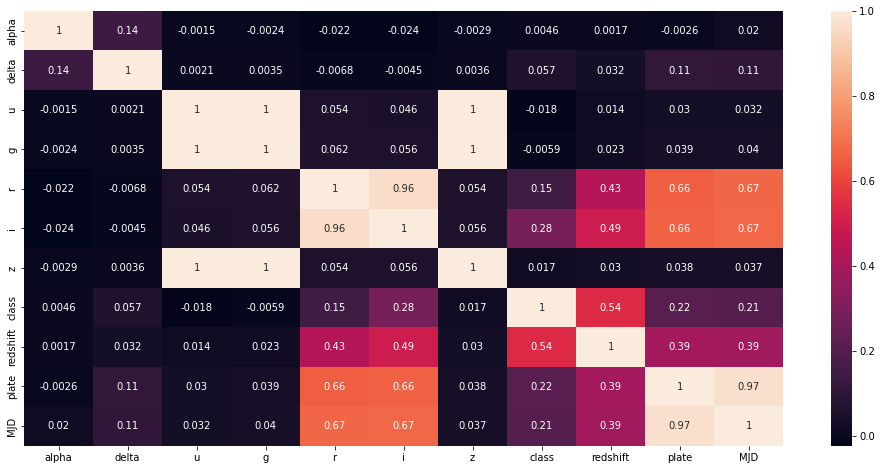

In [17]:
# Correlation heatmap for picture purposes (Updated)
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True);

In [18]:
df.sample(n = 10)

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
39724,234.943340,36.325105,22.34543,20.89683,19.40922,18.83749,18.49088,0,0.313996,10742,58198
24001,113.504097,18.675840,23.58305,22.09571,20.39176,19.51537,18.87622,0,0.491763,4488,55571
23849,53.608548,0.747536,21.07810,19.92879,19.27234,18.93497,18.66603,0,0.164153,1156,52641
1809,133.915441,1.789575,21.99865,21.76653,20.24238,19.07973,18.47926,0,0.719380,3816,55272
17458,208.623545,34.916024,22.74989,21.99461,21.87444,21.53267,20.87687,2,1.622076,8878,57785
21218,118.721106,53.437440,24.25709,23.00981,21.18949,20.04943,19.48958,0,0.597375,3682,55244
83602,256.066748,34.586302,23.54675,25.83301,22.50045,20.61490,18.82040,2,1.478882,10902,58396
17487,250.166186,21.558909,21.69336,21.10574,21.10829,21.14110,21.14199,1,0.000179,4183,55447
32886,114.606122,48.410005,23.14098,22.11633,21.52500,21.32051,20.71745,0,0.604171,3668,55478
78987,131.290506,21.043235,24.48291,22.55243,22.48142,22.29153,21.14596,0,0.306078,9565,58127


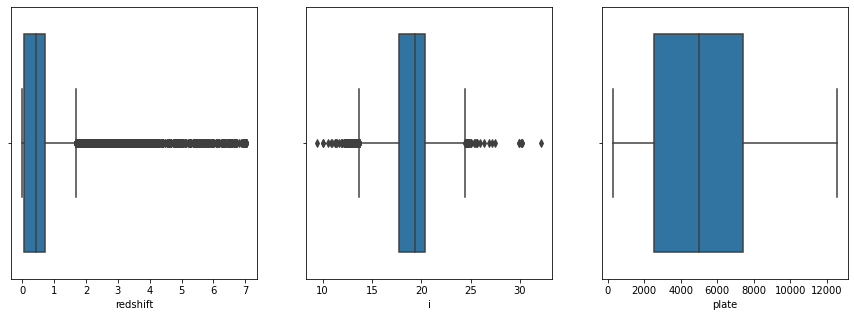

In [19]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 3, 1)
sns.boxplot(x=df['redshift'])
fig.add_subplot(1, 3, 2)
sns.boxplot(x=df['i'])
fig.add_subplot(1, 3, 3)
sns.boxplot(x=df['plate']);

In [20]:
outliers = df.quantile(.97)
df = df[(df['redshift']<outliers['redshift'])]
df = df[(df['i']<outliers['i'])]
df = df[(df['plate']<outliers['plate'])]

In [21]:
print(outliers)

alpha         353.658045
delta          59.043107
u              26.127922
g              23.794621
r              22.296882
i              21.801320
z              21.747994
class           2.000000
redshift        2.486035
plate       10904.000000
MJD         58401.030000
Name: 0.97, dtype: float64


# Oversampling Imbalanced Data - SMOTE

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(pandas.core.frame.DataFrame, numpy.ndarray)

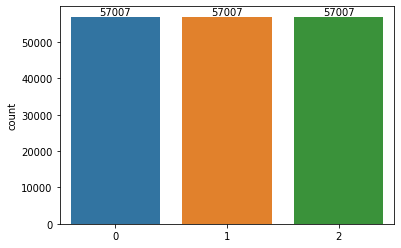

In [15]:
from imblearn.over_sampling import SMOTE
# assign x and y
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

# using oversampling with SMOTE to deal with imbalanced data
sm = SMOTE()
x, y = sm.fit_resample(x, y)

# Plot the oversampled data
ax=sns.countplot(y);
ax.bar_label(ax.containers[0]);
type(x), type(y)

### Scale the Data - Data Standartization

In [16]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
scale = ssc.fit_transform(x) # use standard scaler to scale the data

#Trying Undersampling

In [22]:
from imblearn.under_sampling import RandomUnderSampler
# assign x and y
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values
us = RandomUnderSampler()
x, y = us.fit_resample(x, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(pandas.core.frame.DataFrame, numpy.ndarray)

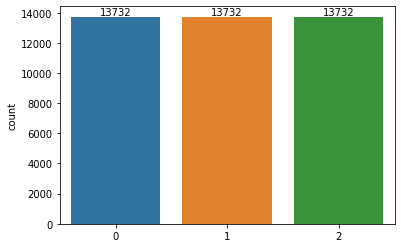

In [23]:
# Plot the undersampled data
ax=sns.countplot(y);
ax.bar_label(ax.containers[0]);
type(x), type(y)

### Scale the Data - Data Standartization

In [24]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
scale = ssc.fit_transform(x) # use standard scaler to scale the data

# Modeling

In [25]:
x = df.drop(['class'], axis = 1)  #drop the target and the rest are features
y = df[['class']] #Real target
type(x), type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [26]:
from sklearn.model_selection import train_test_split
# split the data to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((59479, 10), (32028, 10), (59479, 1), (32028, 1))

In [27]:
# Classification Algorithms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
knn= KNeighborsClassifier()
LGR= LogisticRegression()
DTree = DecisionTreeClassifier()
RForest = RandomForestClassifier()
GBoost=GradientBoostingClassifier()

In [29]:
knn.fit(x_train,y_train)
LGR.fit(x_train,y_train)
DTree.fit(x_train,y_train)
RForest.fit(x_train,y_train)
GBoost.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GradientBoostingClassifier()

#Prediction and score

In [30]:
predK= knn.predict(x_test)
predL= LGR.predict(x_test)
predD= DTree.predict(x_test)
predR= RForest.predict(x_test)
predGB= GBoost.predict(x_test)

In [31]:
print('Accuracy Scores:')
print("KNeighbours: ", accuracy_score(predK,y_test))
print("LogisticReg: ", accuracy_score(predL,y_test))
print("DecisionTree: ", accuracy_score(predD,y_test))
print("RandomForest: ", accuracy_score(predR,y_test))
print("GradientBoosting: ", accuracy_score(predGB,y_test))

Accuracy Scores:
KNeighbours:  0.7959285625078056
LogisticReg:  0.6259835144248782
DecisionTree:  0.9681840889221931
RandomForest:  0.9812039465467716
GradientBoosting:  0.9785187960534533


In [33]:
print(classification_report(predR,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     20121
           1       1.00      0.99      1.00      7314
           2       0.92      0.96      0.94      4593

    accuracy                           0.98     32028
   macro avg       0.97      0.98      0.97     32028
weighted avg       0.98      0.98      0.98     32028



## Accuracy Scores: (Undersampling)
###KNeighbours:  0.7959285625078056
###LogisticReg:  0.6259835144248782
###DecisionTree:  0.9677157487198701
###RandomForest:  0.9812351692269264
###GradientBoosting:  0.9785187960534533

                  precision          recall  f1-score   support

                  0       0.95      0.80      0.87     23498
                  1       0.55      0.80      0.65      4982
                  2       0.54      0.73      0.62      3548

           accuracy                           0.80     32028
          macro avg       0.68      0.78      0.72     32028
        weighted avg       0.84      0.80      0.81     32028

#Test case example

In [42]:
testing = df.sample(random_state = 10)
testing

,alpha,delta,u,g,r,i,z,class,redshift,plate,MJD
65600,5.823409,24.366678,21.24252,19.51915,18.11435,17.56784,17.24259,0,0.232722,6882,56541


In [44]:
output = print(RForest.predict([[187.688903,	29.726022,	19.47637,	17.41737,	16.30425,	15.84989,	15.48384, 0.0004,	2234,	53823]]))
type(output)

[1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


NoneType

In [57]:
output = print(RForest.predict([[187,	30,	19,	17,	16,	16,	15, 0.138,	2234,	53823]]))

[0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
